# Q 2 - MakeMoons & Circles Data

# MAKEMOONS DATASET

The makemoons dataset is a 2D Dataset of 2 cresent moon like clusters with x1 and x2 coordinates. moon dataset does not have predefined feature names associated with it. It is just an array of data points.


**n_samples=1500** is the number of synthetic data points we want to generate. 


**random_state** is used to set the random seed for "reproducibility". It makes sure everytime we generate dataset with the same random_state value we will get same datapoints.


In [1]:
#importing 
import sklearn
from sklearn.datasets import make_moons
from sklearn.datasets import make_circles
from sklearn import datasets
from sklearn import svm
import matplotlib.pyplot as plt

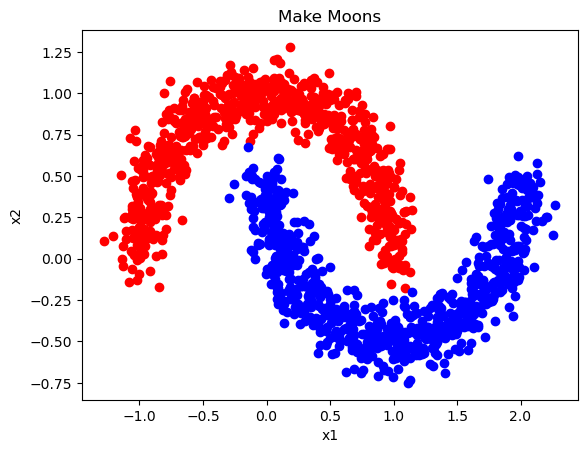

In [2]:

# Generating synthetic data points
X_moon, y_moon = make_moons(n_samples=1500, noise=0.1, random_state=10)

# Plotting moons
plt.scatter(X_moon[:, 0][y_moon == 0], X_moon[:, 1][y_moon == 0], c='red')
plt.scatter(X_moon[:, 0][y_moon == 1], X_moon[:, 1][y_moon == 1], c='blue')

# Customizing moons graph
plt.xlabel("x1")
plt.ylabel("x2")
plt.title("Make Moons")
plt.show()


# CIRCLES DATASET

It is a dataset of 2 concentric circles. X is 2D array with values x1 and x2. y has values 0 or 1 . make_circles() is used to generate this dataset

**n_samples=1500** is the number of synthetic data points we want to generate. 

**factor** : used for scaling bw outer and ineer circles

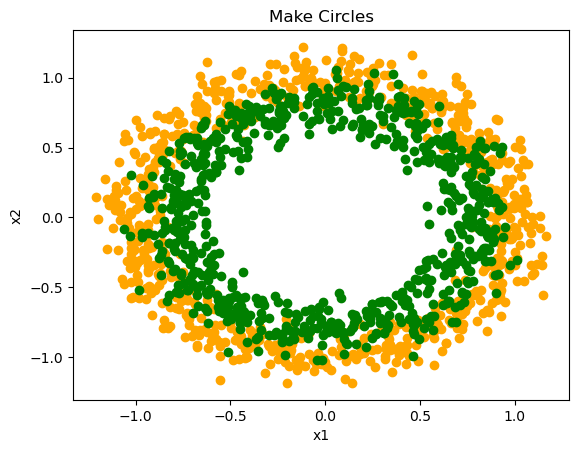

In [3]:
X_c, y_c = make_circles(n_samples=1500, noise=0.1, random_state=10)

# Plotting circles
plt.scatter(X_c[:, 0][y_c == 0], X_c[:, 1][y_c == 0], c='orange')
plt.scatter(X_c[:, 0][y_c == 1], X_c[:, 1][y_c == 1], c='green')

# Customizing circles graph
plt.title("Make Circles")
plt.xlabel("x1")
plt.ylabel("x2")
plt.show()


In [4]:
# SIR CODE 

import numpy as np
from sklearn import datasets
import time # for calculting computation cost
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt



class SVM:
    def __init__(self, C=1.0, kernel='rbf', sigma=0.1, degree=2):
        self.C = C
        if kernel == 'poly':
            self.kernel = self._polynomial_kernel
            self.C = 1
            self.degree = degree
        elif kernel == 'rbf':
            self.kernel = self._rbf_kernel
            self.sigma = sigma
        else:
            self.kernel = self._linear_kernel
            
        self.X = None  # inputs
        self.y = None  # target
        self.alpha = None  # lagrangian multiplier
        self.b = 0  # bias
        self.ones = None
    
    def _rbf_kernel(self, X_t, X):
        return np.exp(-(1 / self.sigma ** 2) * np.linalg.norm(X_t[:, np.newaxis] - X[np.newaxis, :], axis=2) ** 2)
    
    def _polynomial_kernel(self, X_t, X):
        return (X_t.dot(X.T)) ** self.degree
    
    def _linear_kernel(self, X, X_t):
        return (X.dot(X_t.T))
    
    
    def fit(self, X, y, lr=1e-3, epochs=200):
        self.X = X
        self.y = y
        self.alpha = np.ones(X.shape[0])
        self.b = 0
        self.ones = np.ones(X.shape[0])
        y_outer = np.outer(y, y)
        y_iy_jk_ij = y_outer * self.kernel(X, X)
        losses = []
        
        for _ in range(epochs):
            gradient = self.ones - y_iy_jk_ij.dot(self.alpha)
            self.alpha = self.alpha + lr * gradient
            self.alpha[self.alpha > self.C] = self.C
            self.alpha[self.alpha < 0] = 0
            gain = np.sum(self.alpha) - 0.5 * np.sum(np.outer(self.alpha, self.alpha) * y_iy_jk_ij)
            losses.append(gain)
        
        index = np.where((self.alpha > 0) & (self.alpha < self.C))[0]
        b_i = y[index] - (self.alpha * y).dot(self.kernel(X, X[index]))
        self.b = np.mean(b_i)
        
        
        plt.plot(losses, color="purple")
        
        plt.title("Loss per Epoch")
        plt.xlabel("Epoch")
        plt.ylabel("Loss")
        
        plt.show()
    
    def _decision_function(self, X):
        return (self.alpha * self.y).dot(self.kernel(self.X, X)) + self.b
    
    def predict(self, X):
        return np.sign(self._decision_function(X))
    
    def score(self, X, y):
        y_hat = self.predict(X)
        return np.mean(y == y_hat)
    
    def plot_decision_boundary(self):
        plt.scatter(self.X[:, 0], self.X[:, 1], c=self.y, s=50, cmap=plt.cm.Paired, alpha=.5)
        ax = plt.gca()
        xlim = ax.get_xlim()
        ylim = ax.get_ylim()

        xx = np.linspace(xlim[0], xlim[1], 30)
        yy = np.linspace(ylim[0], ylim[1], 30)
        YY, XX = np.meshgrid(yy, xx)
        xy = np.vstack([XX.ravel(), YY.ravel()]).T

        Z = self._decision_function(xy).reshape(XX.shape)

        ax.contour(XX, YY, Z, colors=['purple', 'orange', 'green'], levels=[-1, 0, 1], alpha=0.5,
               linestyles=['--', '-', '--'], linewidths=[2.0, 2.0, 2.0])
        ax.scatter(self.X[:, 0][self.alpha > 0.], self.X[:, 1][self.alpha > 0.],
               s=50, linewidth=1, facecolors='yellow', edgecolors='black')

        plt.show()




In [5]:
class SampleData:
    
    def get_binary(self, n_samples, noise=0.05, random_state=3):
        n = n_samples
        blobs = datasets.make_blobs(n_samples=n, centers=2, n_features=2, cluster_std=2, random_state=random_state)
        return blobs[0], blobs[1]
    
    
    def get_moon(self, n_samples, noise=0.05):
        noisy_moons = datasets.make_moons(n_samples=n_samples, noise=noise, random_state=6)
        return noisy_moons[0], noisy_moons[1]
    
    
    def get_donut(self, n_samples, noise=0.05, factor=0.5):
        noisy_circles = datasets.make_circles(n_samples=n_samples, factor=factor, noise=noise)
        return noisy_circles[0], noisy_circles[1]
    
    
    def plot(self, X, y):
        ax = plt.gca()
        ax.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Paired)
        plt.show()


---------------------------

#  Cross Validation  with k Folds 

Before Doing Cross Validaiton, let us understand what it is .

# KFolds Cross Validation? 
K Fold technique is used for testing whether our trained model be able to generalise on new data set. It makes sure that the train and testing score of model will not depend on the way we chose our training & testing set




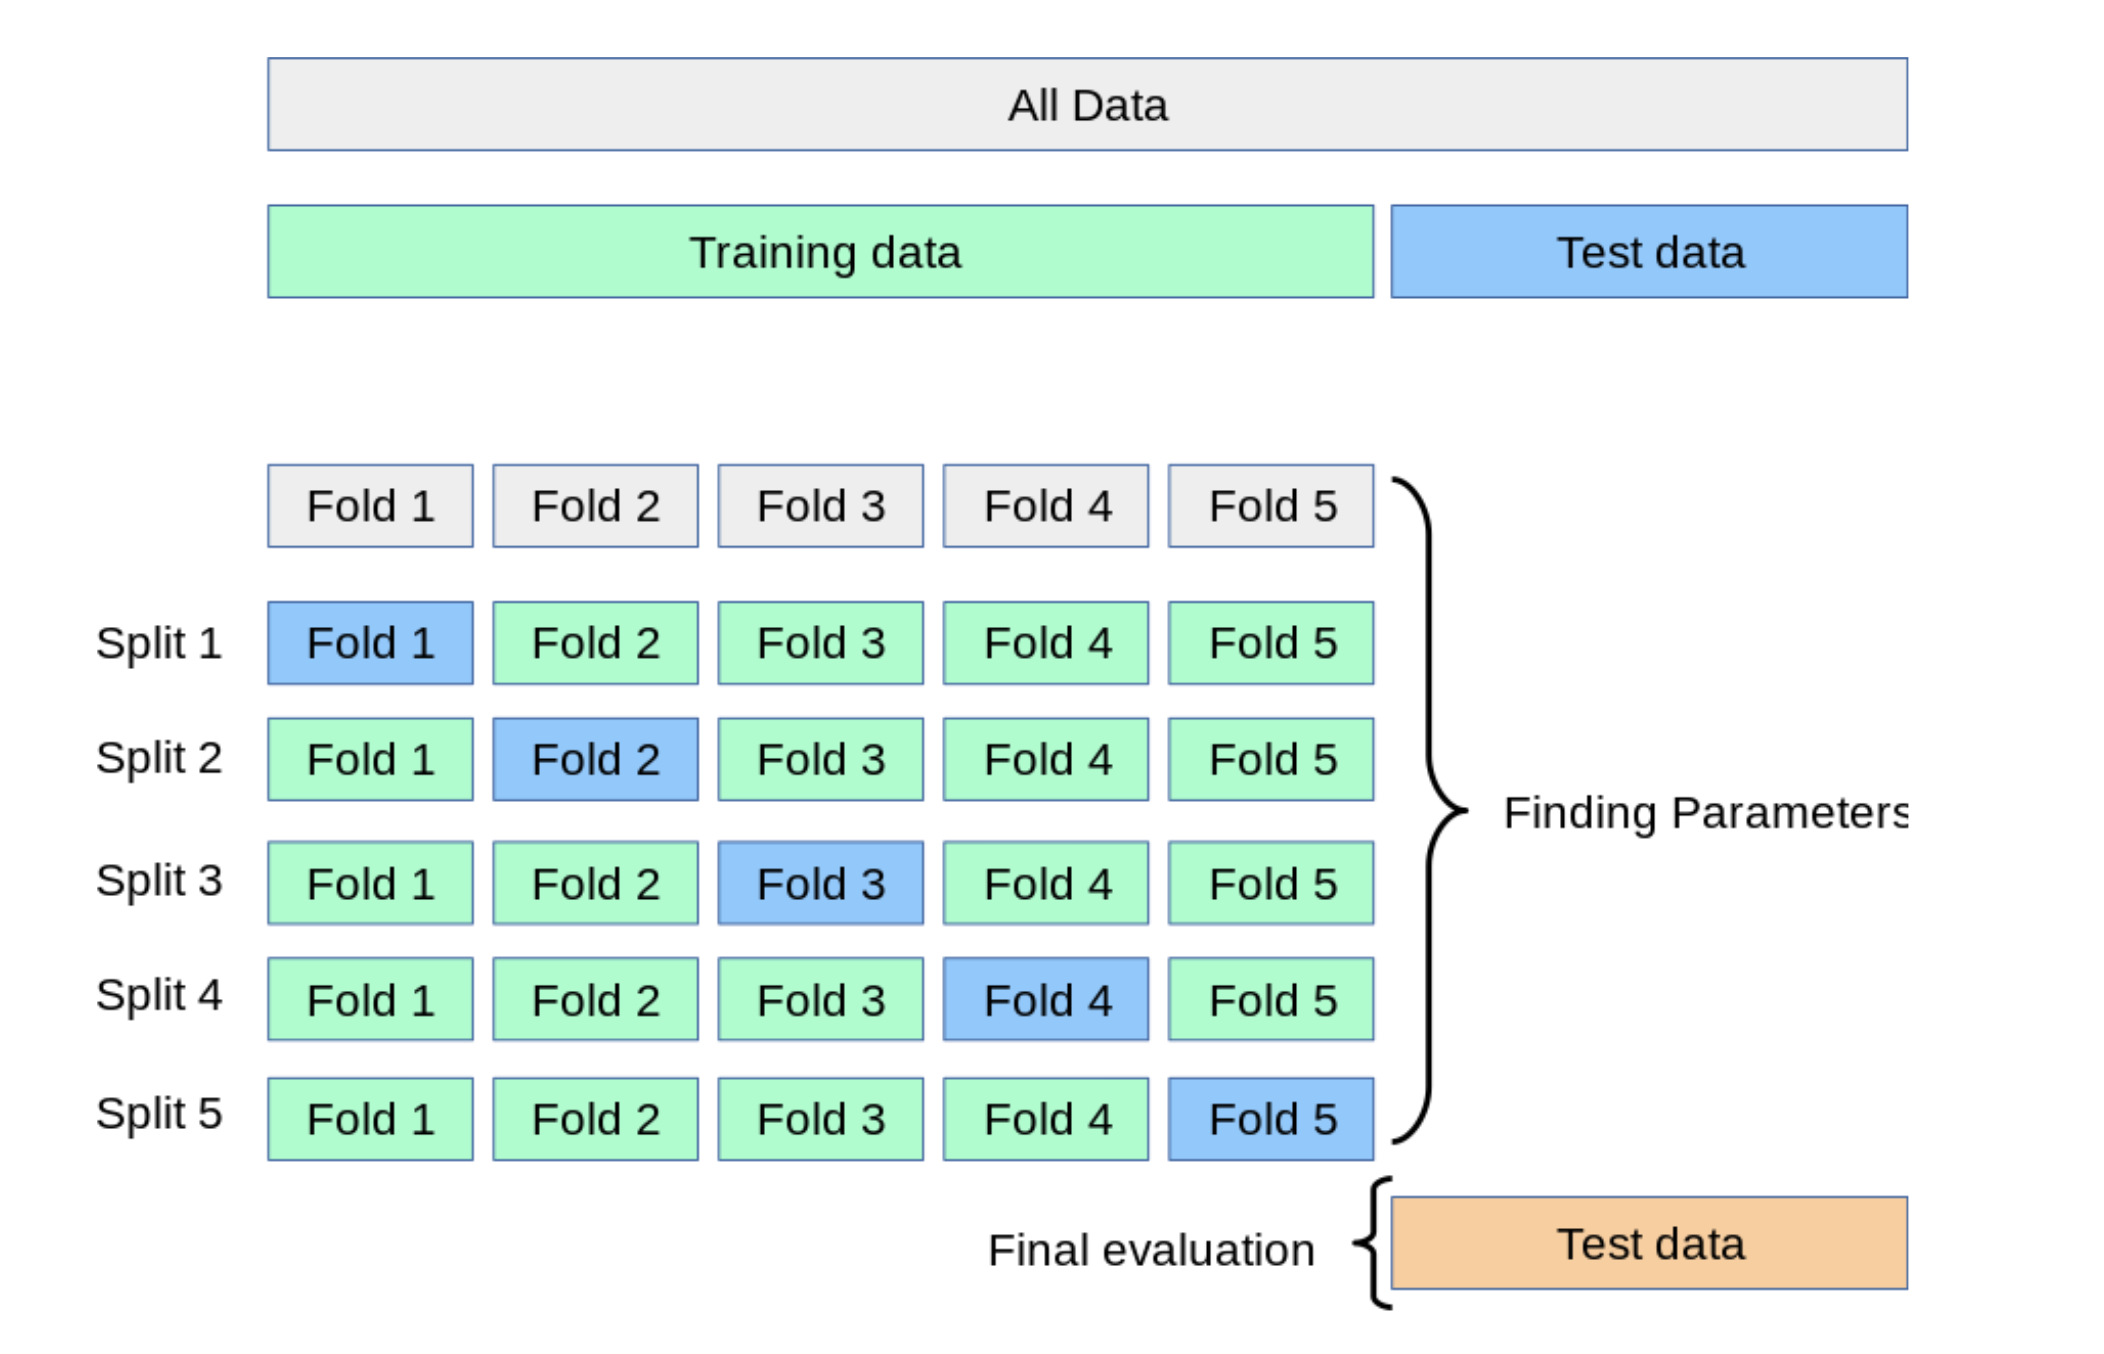

# Defining the KFold Cross Validation Function


In [6]:

from sklearn.model_selection import KFold
from IPython.display import Markdown, display
import numpy as np
import matplotlib.pyplot as plt
import numpy as np
import time # for calculting computation cost


def kFolds(X,y):
 #highlighting 
    HIGHLIGHT_START = '\033[1;32m'  # Start highlight
    HIGHLIGHT_END = '\033[0m'  # End highlighting


   # because SVMS -1 to 1 
    y[y == 0] = -1
   

    #defining the 3 kernels we will use 
    kernels = ['linear', 'poly', 'rbf']
    
    # number of folds = 4 
    kFold = KFold(n_splits=4,shuffle=True)
    
    


    for i in kernels:
        
        start= time.time() #start time 
        display(Markdown('''---'''))
        
        scores = []
        number_of_splits = 0
    
    
        for train_index, test_index in kFold.split(X):
            number_of_splits += 1

            X_train, X_test, y_train, y_test = X[train_index], X[test_index], y[train_index], y[test_index]

            svm = SVM(C=1.0, kernel=i, sigma=0.5)
            svm.fit(X_train, y_train, lr=0.0001)
            
            
            #training Score
            training_score = svm.score(X_train, y_train)
            scores.append(svm.score(X_test, y_test))  # This is the testing score
            
            svm.plot_decision_boundary()
        
            
            print(f"{HIGHLIGHT_START}Split  : {number_of_splits}{HIGHLIGHT_END}")  
            print(f"{HIGHLIGHT_START}Kernel : {i}{HIGHLIGHT_END}")  

            print(f"Training Score : {training_score:.2f}")
            
            print(f"Testing Score  : {scores}")
            
                
            display(Markdown('''---'''))
        end=time.time() #End time
        totaltime= end-start
        
        print(f"{HIGHLIGHT_START}Computation Time for {i} Kernel: {totaltime:.2f} seconds{HIGHLIGHT_END}")
        
        plt.plot(scores, '-.s')
        scores=np.array(scores)
        plt.axhline(scores.mean())
        
        plt.fill_between(list(range(len(scores))), np.array(scores) - np.std(scores), np.array(scores) + np.std(scores), color='cyan')

        plt.title("cross val score for {} kernel with mean and std deviation".format(i),fontweight="bold")
        
        plt.xlabel('Fold Number')
        plt.ylabel('Accuracy')
        plt.show()


# Cross Validation for Moonset 

---

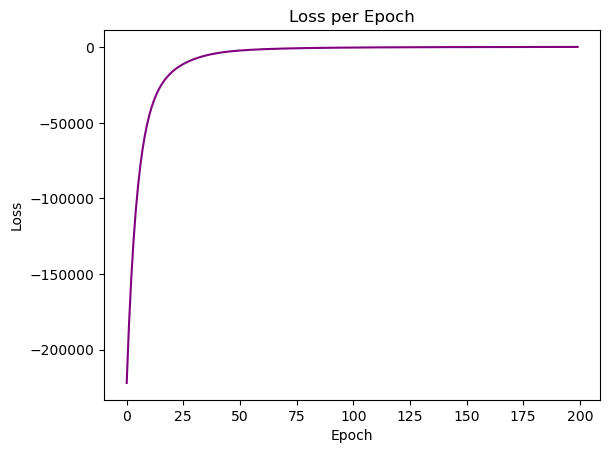

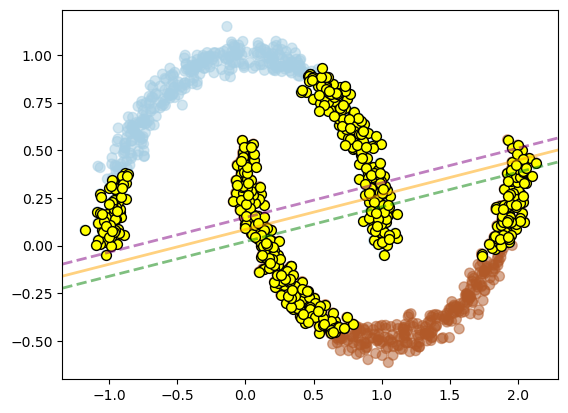

Split  : 1
Kernel : linear
Training Score : 0.88
Testing Score  : [0.872]


---

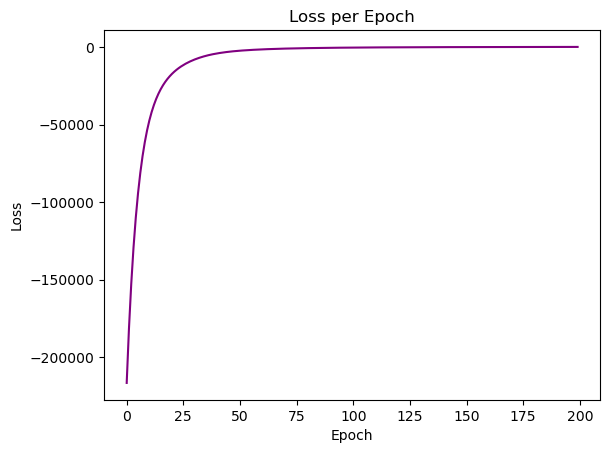

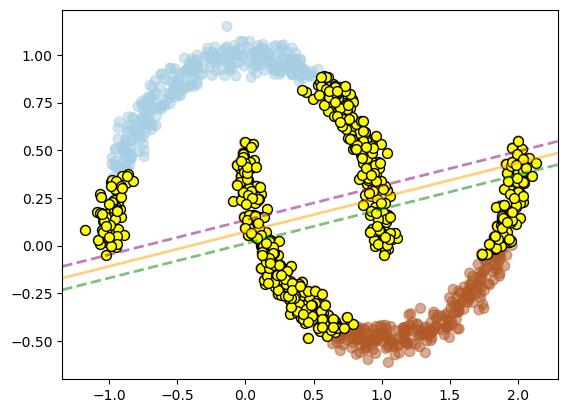

Split  : 2
Kernel : linear
Training Score : 0.89
Testing Score  : [0.872, 0.8426666666666667]


---

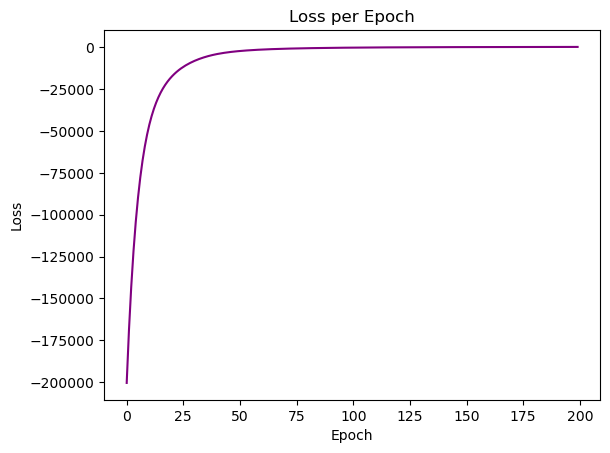

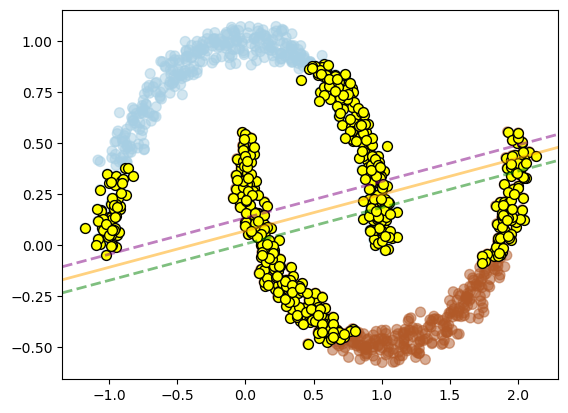

Split  : 3
Kernel : linear
Training Score : 0.87
Testing Score  : [0.872, 0.8426666666666667, 0.9066666666666666]


---

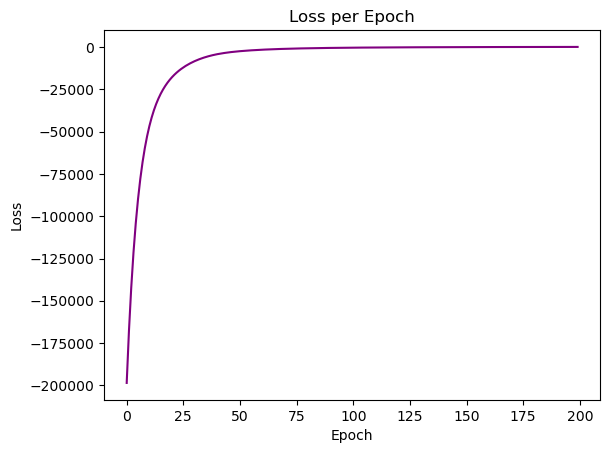

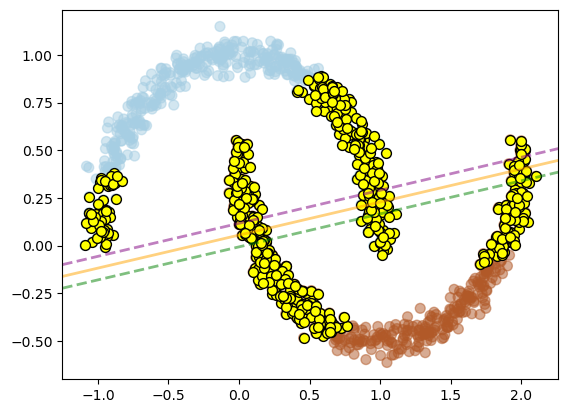

Split  : 4
Kernel : linear
Training Score : 0.87
Testing Score  : [0.872, 0.8426666666666667, 0.9066666666666666, 0.8773333333333333]


---

Computation Time for linear Kernel: 3.48 seconds


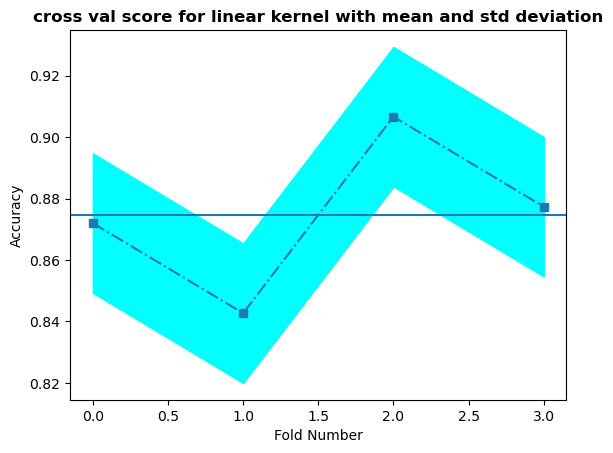

---

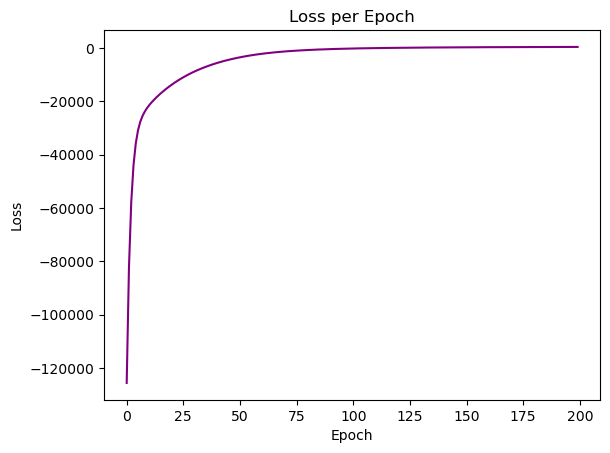

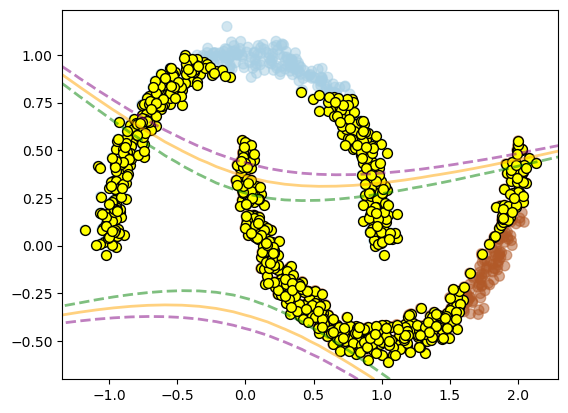

Split  : 1
Kernel : poly
Training Score : 0.81
Testing Score  : [0.8133333333333334]


---

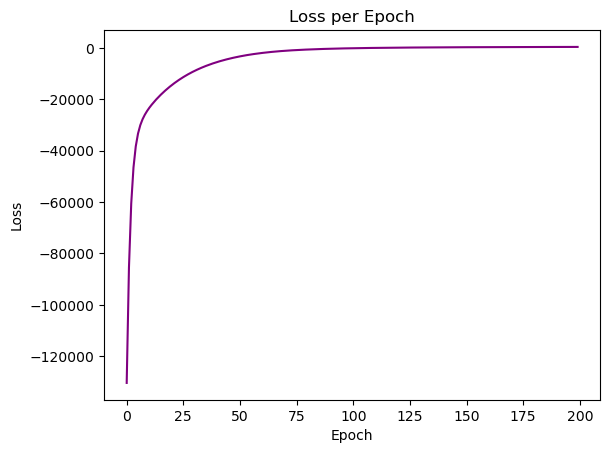

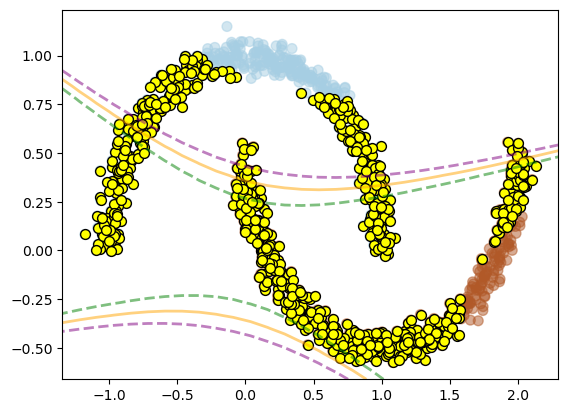

Split  : 2
Kernel : poly
Training Score : 0.82
Testing Score  : [0.8133333333333334, 0.7946666666666666]


---

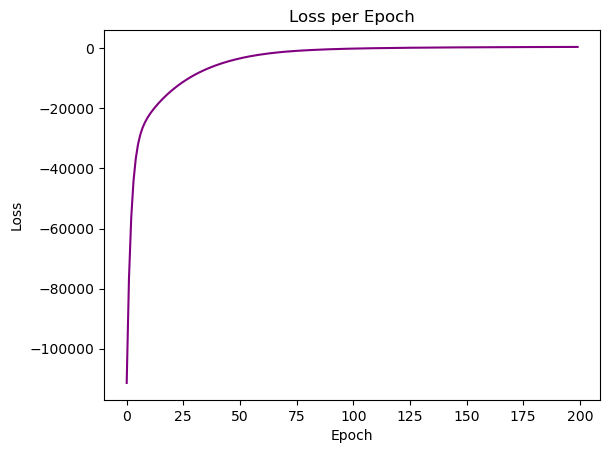

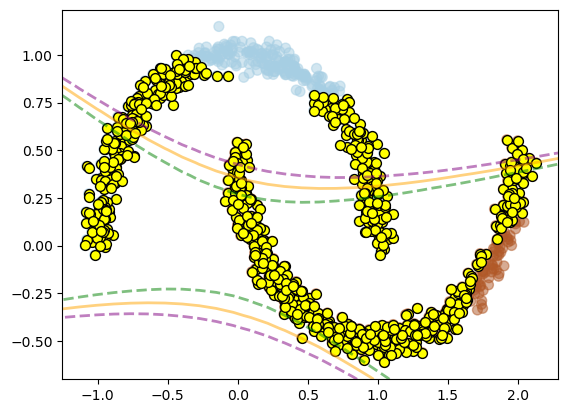

Split  : 3
Kernel : poly
Training Score : 0.80
Testing Score  : [0.8133333333333334, 0.7946666666666666, 0.8186666666666667]


---

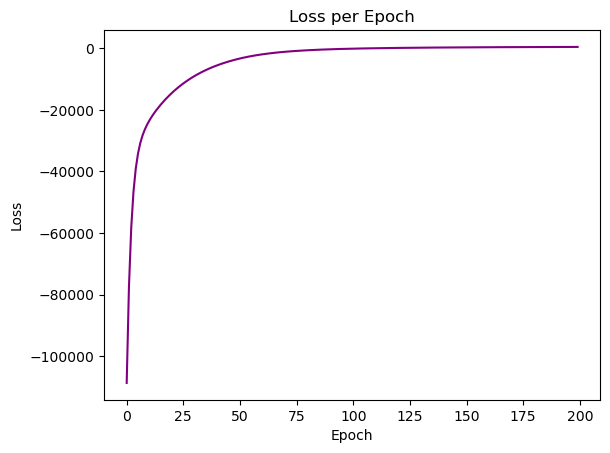

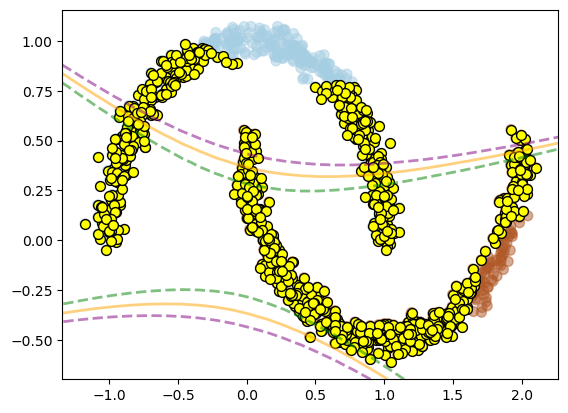

Split  : 4
Kernel : poly
Training Score : 0.81
Testing Score  : [0.8133333333333334, 0.7946666666666666, 0.8186666666666667, 0.8186666666666667]


---

Computation Time for poly Kernel: 3.11 seconds


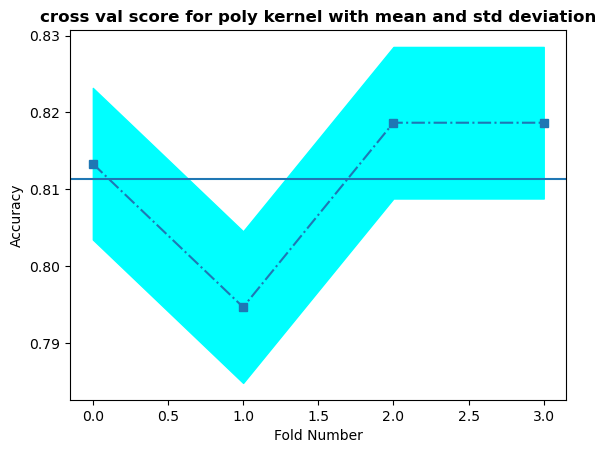

---

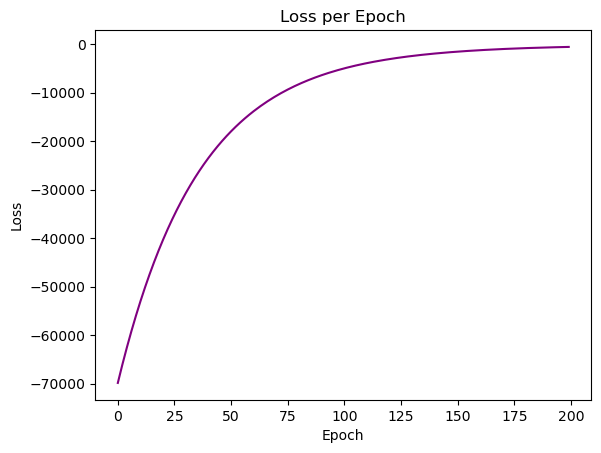

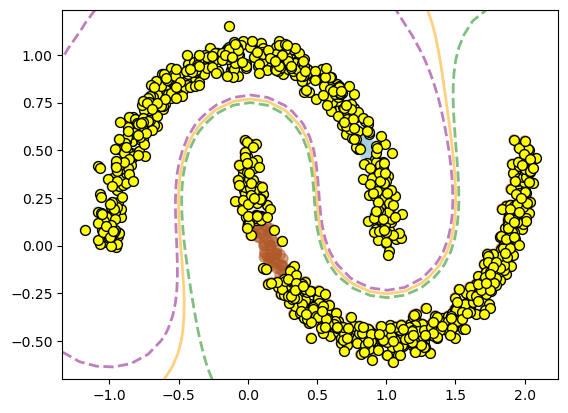

Split  : 1
Kernel : rbf
Training Score : 1.00
Testing Score  : [1.0]


---

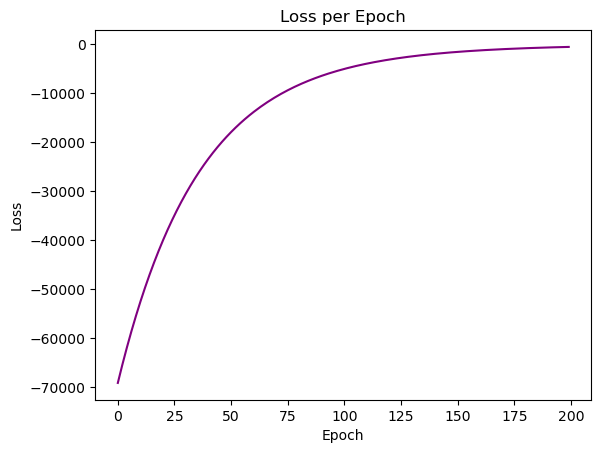

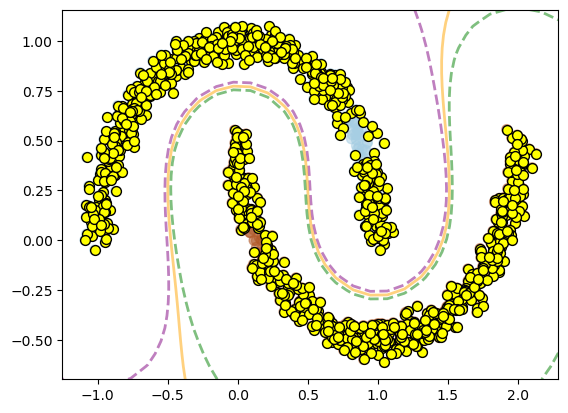

Split  : 2
Kernel : rbf
Training Score : 1.00
Testing Score  : [1.0, 1.0]


---

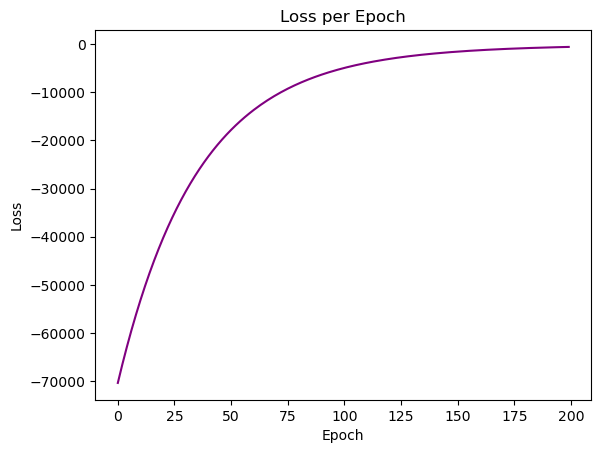

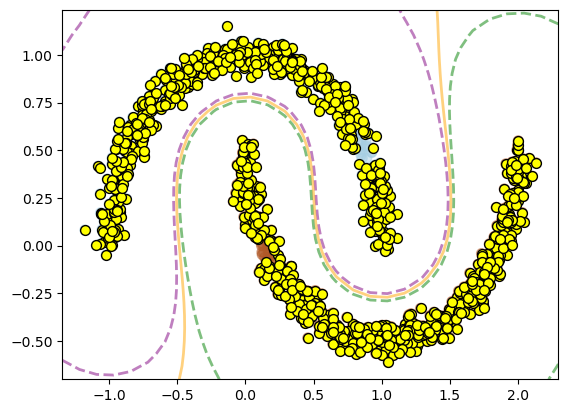

Split  : 3
Kernel : rbf
Training Score : 1.00
Testing Score  : [1.0, 1.0, 1.0]


---

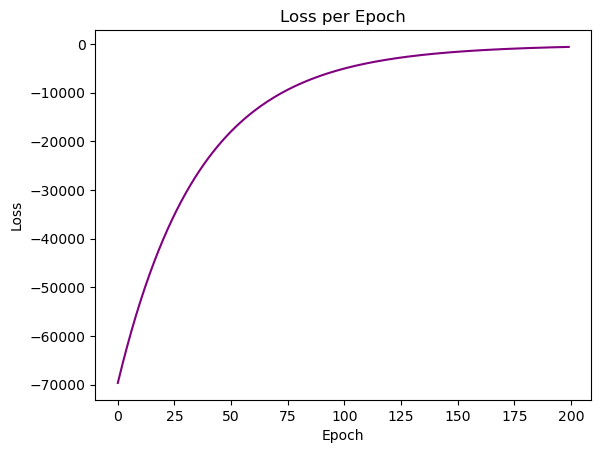

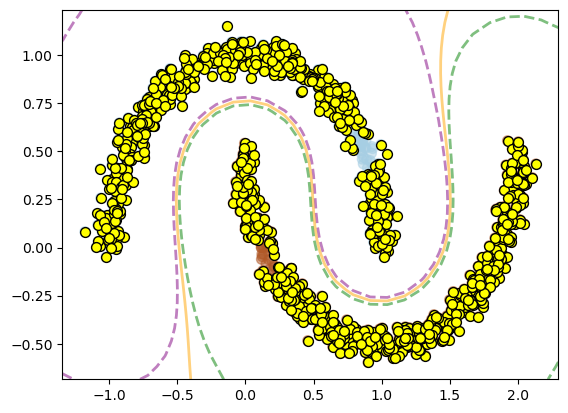

Split  : 4
Kernel : rbf
Training Score : 1.00
Testing Score  : [1.0, 1.0, 1.0, 1.0]


---

Computation Time for rbf Kernel: 3.72 seconds


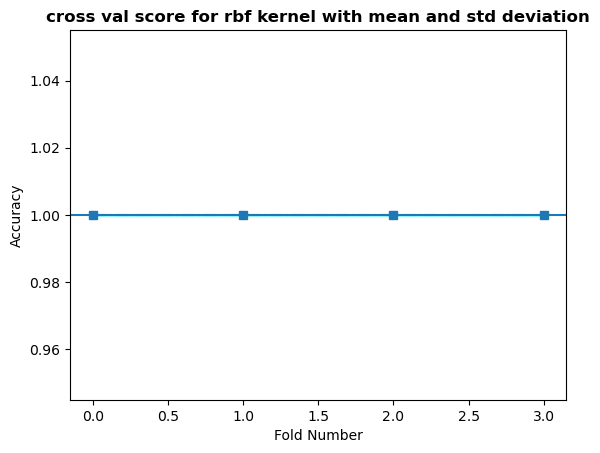

In [7]:
sample_data = SampleData()
X, y = sample_data.get_moon(n_samples=1500)
kFolds(X,y)

**Analysis for Cross Validation - Moonset**

rbf kernel gives the best training and testing score

# Cross Validation for Circles 

---

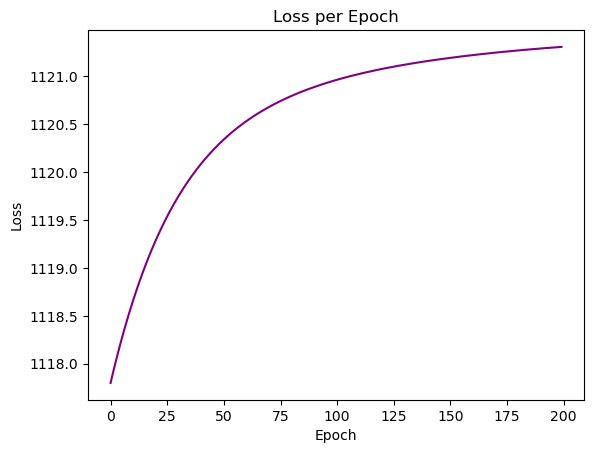

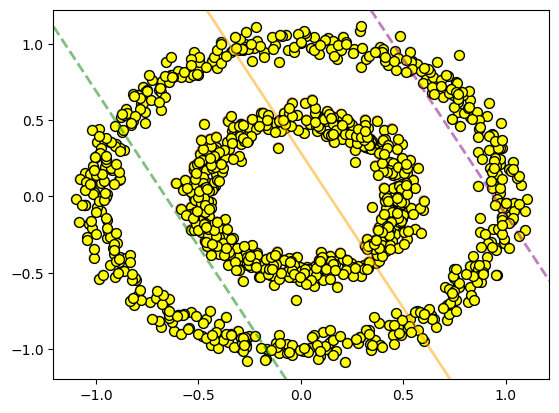

Split  : 1
Kernel : linear
Training Score : 0.52
Testing Score  : [0.5066666666666667]


---

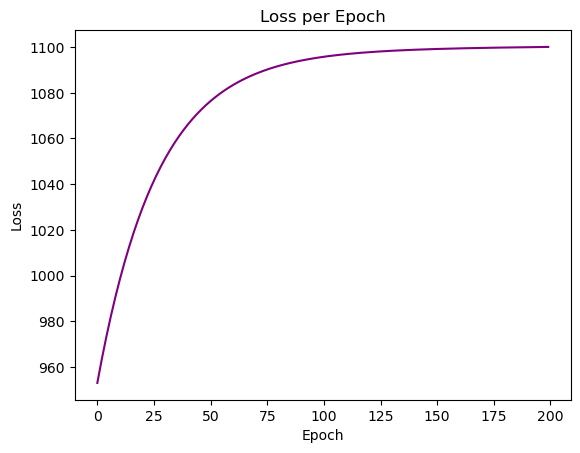

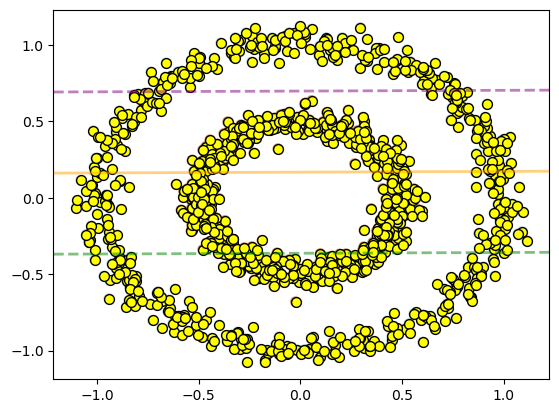

Split  : 2
Kernel : linear
Training Score : 0.54
Testing Score  : [0.5066666666666667, 0.48533333333333334]


---

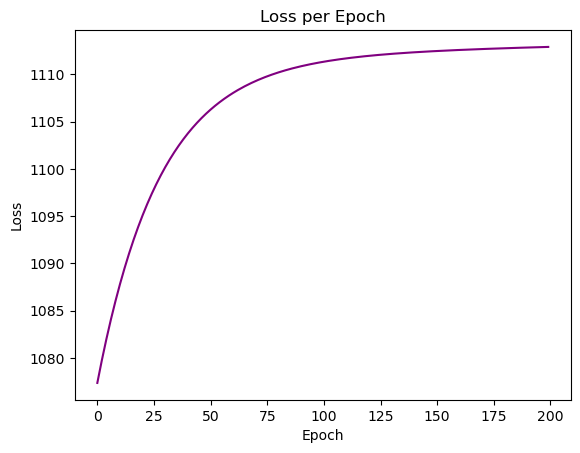

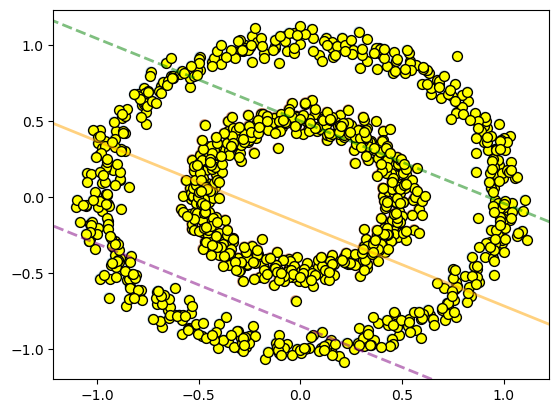

Split  : 3
Kernel : linear
Training Score : 0.54
Testing Score  : [0.5066666666666667, 0.48533333333333334, 0.48533333333333334]


---

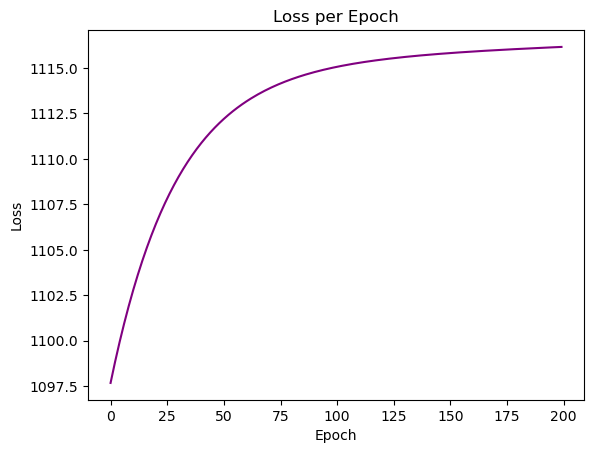

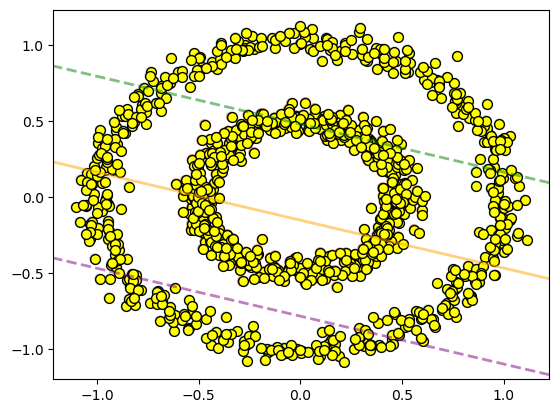

Split  : 4
Kernel : linear
Training Score : 0.53
Testing Score  : [0.5066666666666667, 0.48533333333333334, 0.48533333333333334, 0.5146666666666667]


---

Computation Time for linear Kernel: 3.29 seconds


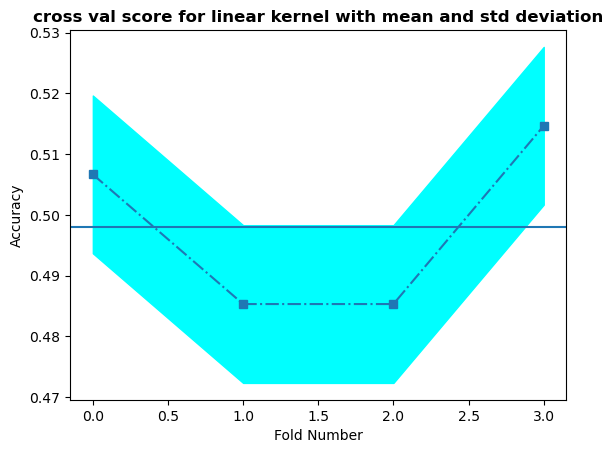

---

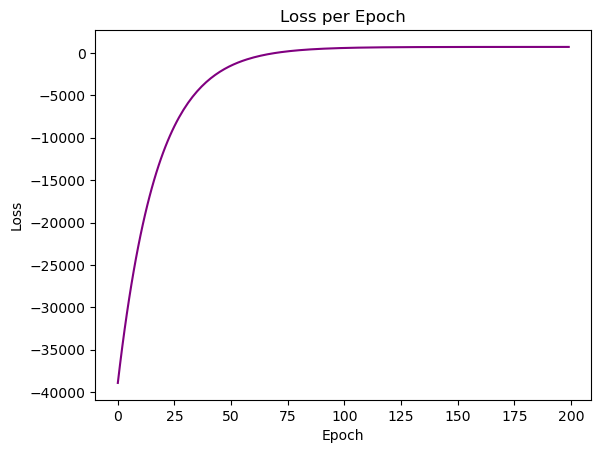

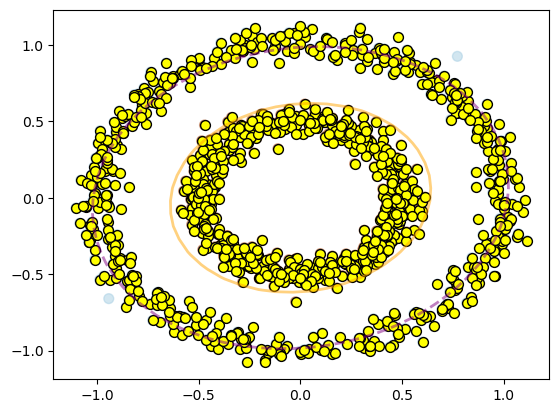

Split  : 1
Kernel : poly
Training Score : 0.99
Testing Score  : [0.992]


---

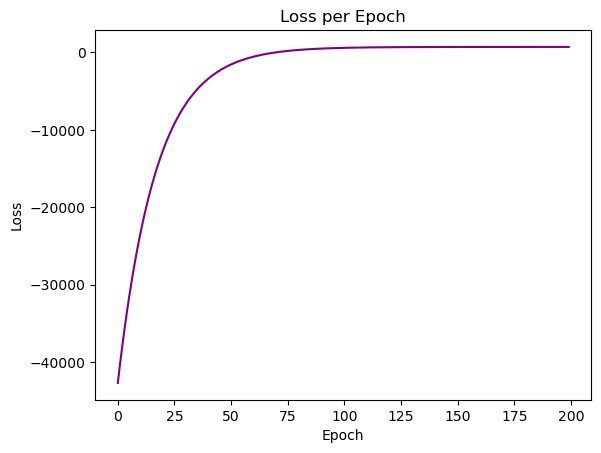

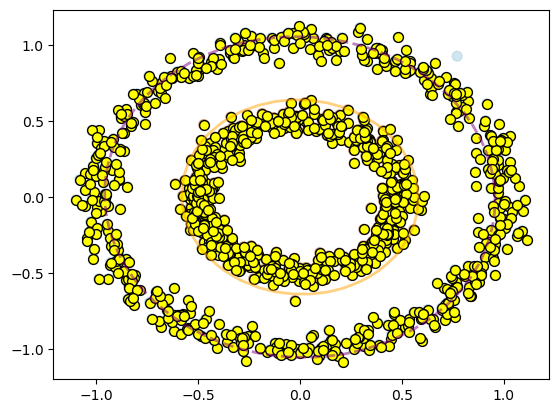

Split  : 2
Kernel : poly
Training Score : 0.99
Testing Score  : [0.992, 0.9813333333333333]


---

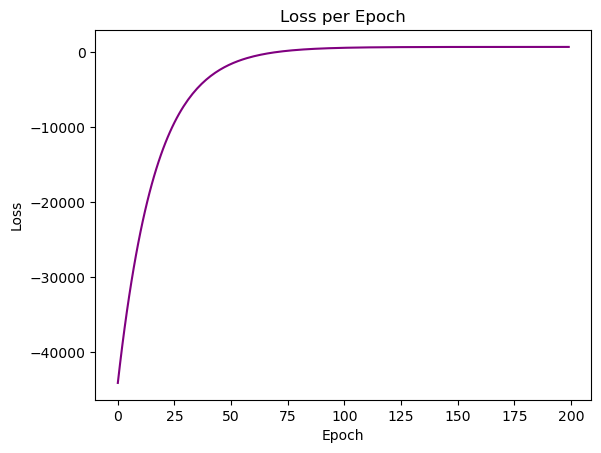

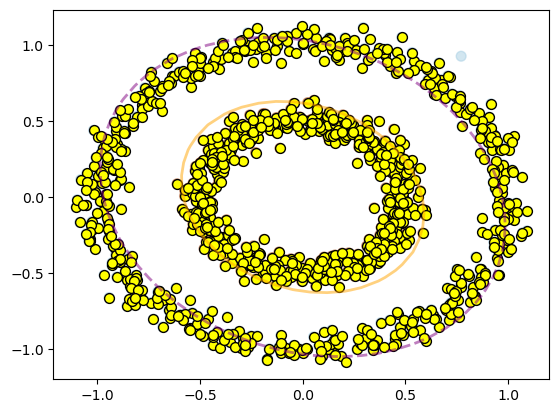

Split  : 3
Kernel : poly
Training Score : 0.98
Testing Score  : [0.992, 0.9813333333333333, 0.968]


---

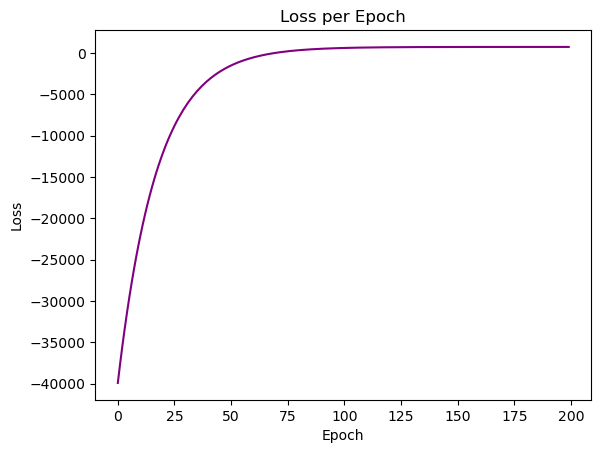

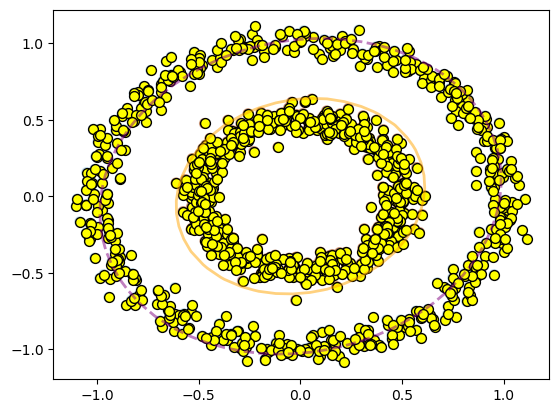

Split  : 4
Kernel : poly
Training Score : 0.99
Testing Score  : [0.992, 0.9813333333333333, 0.968, 0.992]


---

Computation Time for poly Kernel: 3.55 seconds


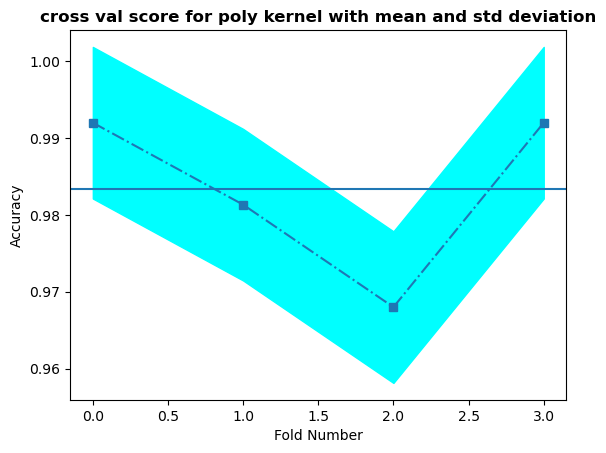

---

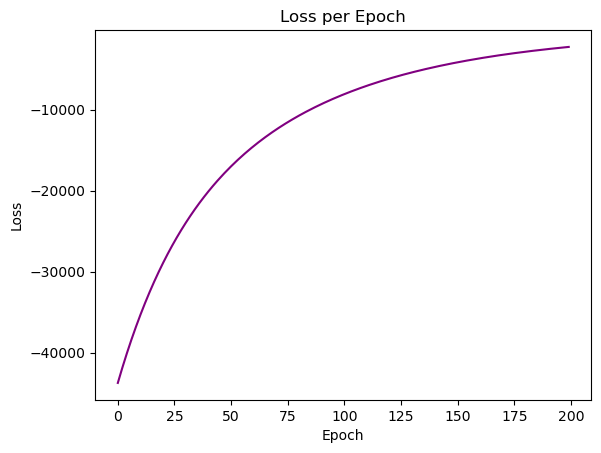

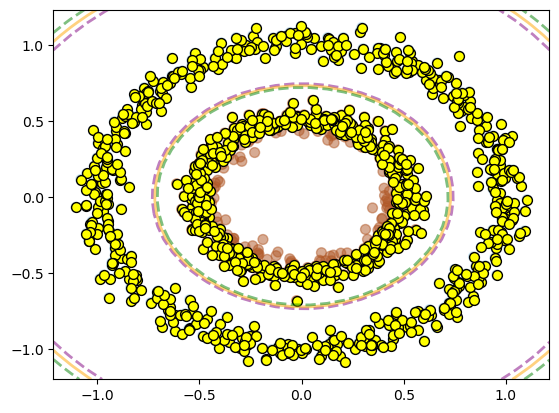

Split  : 1
Kernel : rbf
Training Score : 1.00
Testing Score  : [1.0]


---

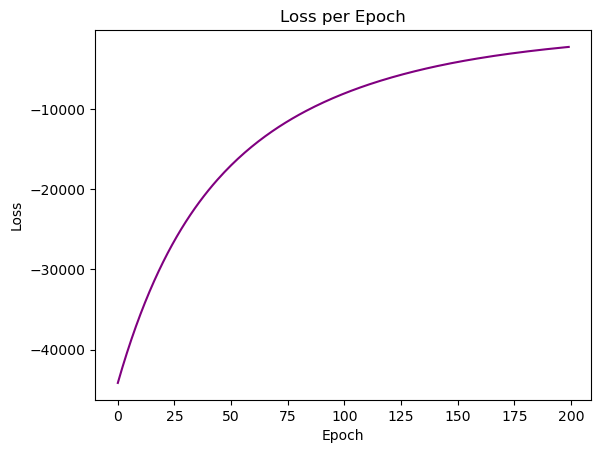

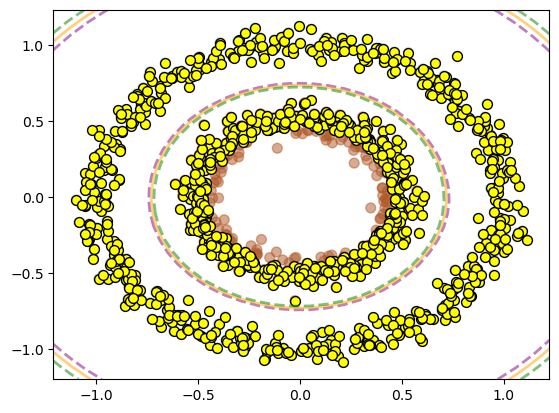

Split  : 2
Kernel : rbf
Training Score : 1.00
Testing Score  : [1.0, 1.0]


---

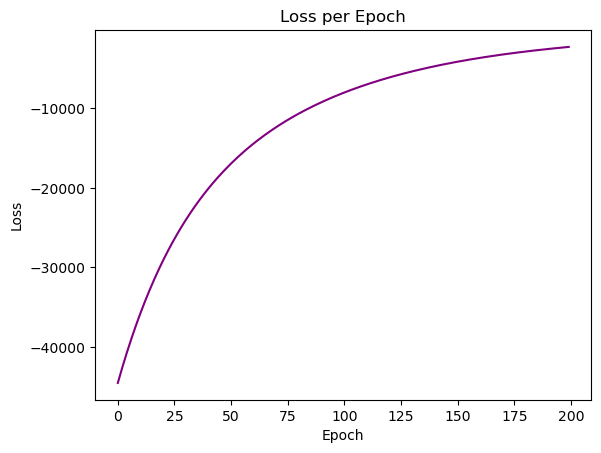

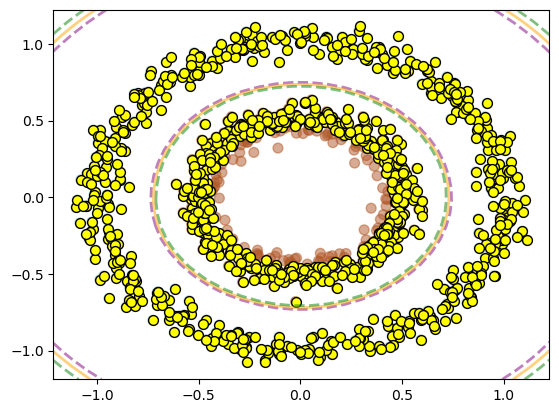

Split  : 3
Kernel : rbf
Training Score : 1.00
Testing Score  : [1.0, 1.0, 1.0]


---

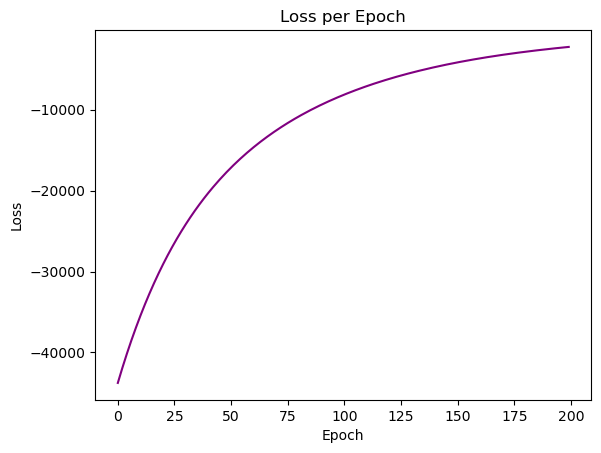

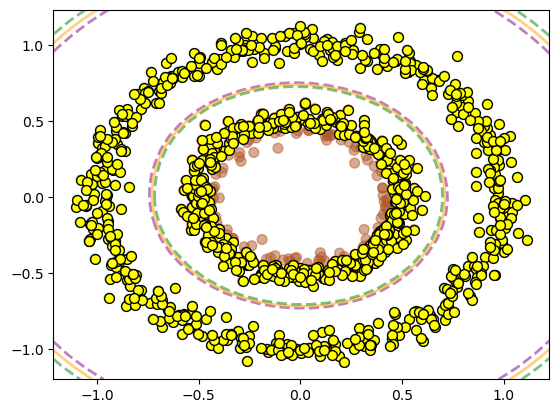

Split  : 4
Kernel : rbf
Training Score : 1.00
Testing Score  : [1.0, 1.0, 1.0, 1.0]


---

Computation Time for rbf Kernel: 3.66 seconds


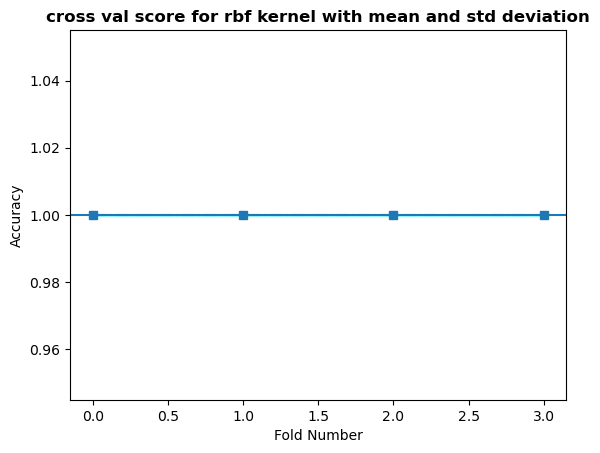

In [8]:
sample_data = SampleData()
X, y = sample_data.get_donut(n_samples=1500)
kFolds(X,y)

**Analysis for Cross Validation - Circles**

rbf kernel gives the best training and testing score

--------------------------------------------------------------------

# Q3 PART I 

# What is MLP ? 
MLP is Multi Layer Perceptron Class "MLPClassifier" implements a multi-layer perceptron (MLP) algorithm that trains using Backpropagation.

**Defining  MLP classifier**

Solver : used for weights optimissation . "sgd" stands for stochastic gradient descent. 

Alpha : L2 Regularisation term 
    
learning_rate_init : It controls the step size in updating weights



# How do we know the optimum hidden layer

 Grid search : For trying different combinations of sizes hidden layer sizes. We will evaluate hidden layer size using cross validaion. 


In [9]:
def plot_decision_boundary_mlp(X, y, mlp):
    plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap=plt.cm.Paired, alpha=.5)
    ax = plt.gca()
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()
        
        
    xx = np.linspace(xlim[0], xlim[1], 30)
    yy = np.linspace(ylim[0], ylim[1], 30)
    
    YY, XX = np.meshgrid(yy, xx)
    xy = np.vstack([XX.ravel(), YY.ravel()]).T
    
        
    Z = mlp.predict(xy).reshape(XX.shape)
    
    levels = np.unique(Z)
        
    ax.contour(XX, YY, Z, colors=['b', 'g', 'r'], levels = levels, alpha=0.5,
               linestyles=['--', '-', '--'], linewidths=[2.0, 2.0, 2.0])
    
    
    
    
    plt.show()

In [10]:
# Function for Accuracy Scores & Plotting Cross Validation Scores

from sklearn.metrics import accuracy_score
from sklearn.neural_network import MLPClassifier
import warnings
warnings.filterwarnings("ignore")



def calculating_accuracy_score(X, y, mlp):
    # highlighting
    HIGHLIGHT_START = '\033[1;32m'  # Start highlight
    HIGHLIGHT_END = '\033[0m'  # End highlighting

    kFold = KFold(n_splits=4, random_state=42, shuffle=True)
    number_of_splits = 0
    scores = []

    for train_index, test_index in kFold.split(X):
        number_of_splits += 1
        X_train, X_test, y_train, y_test = X[train_index], X[test_index], y[train_index], y[test_index]

        mlp.fit(X_train, y_train)
        plot_decision_boundary_mlp(X_train, y_train, mlp)

        training_score = accuracy_score(y_train, mlp.predict(X_train))
        testing_score = accuracy_score(y_test, mlp.predict(X_test))

        scores.append(testing_score)  # This is the testing score

        print(f"{HIGHLIGHT_START}Split  : {number_of_splits}{HIGHLIGHT_END}")
        print(f"Training Score : {training_score:.3f}")
        print(f"Testing Score  : {scores}")

        display(Markdown('''---'''))

    # Plotting the graph for cross validation
    sc_arr = np.array(scores)
    print(f"Cross Validation Score : {sc_arr}")

    plt.plot(sc_arr, '-.s')

    plt.axhline(sc_arr.mean())
    # plt.fill_between(list(range(len(sc_arr))), sc_arr - np.std(sc_arr), sc_arr + np.std(sc_arr), color='cyan')

    # Customising the Graph
    plt.title("Cross Validation Score with Mean and Standard Deviation")
    plt.xlabel('Fold Number')
    plt.ylabel('Accuracy')
    plt.show()



# MLP  - Makemoons 

In [11]:
from sklearn.neural_network import MLPClassifier

mlp = MLPClassifier(solver='sgd', alpha=1e-1, hidden_layer_sizes=(30,), random_state=1, learning_rate_init=0.1)

sample= SampleData()

X, y = make_moons(n_samples=1500, noise=0.05)

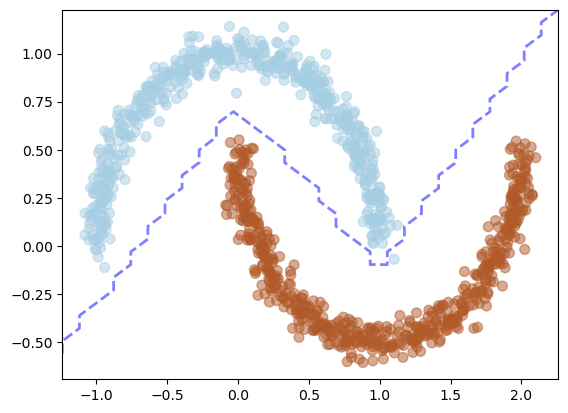

Split  : 1
Training Score : 1.000
Testing Score  : [1.0]


---

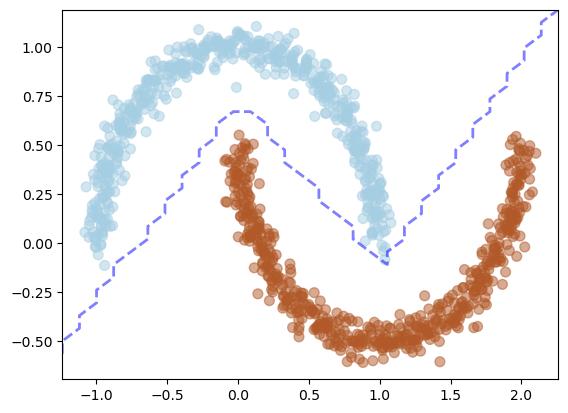

Split  : 2
Training Score : 1.000
Testing Score  : [1.0, 1.0]


---

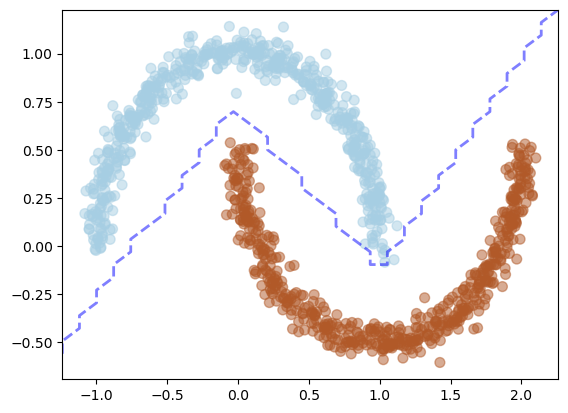

Split  : 3
Training Score : 1.000
Testing Score  : [1.0, 1.0, 1.0]


---

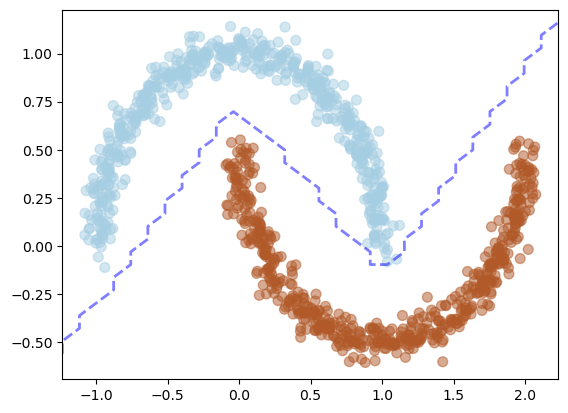

Split  : 4
Training Score : 1.000
Testing Score  : [1.0, 1.0, 1.0, 1.0]


---

Cross Validation Score : [1. 1. 1. 1.]


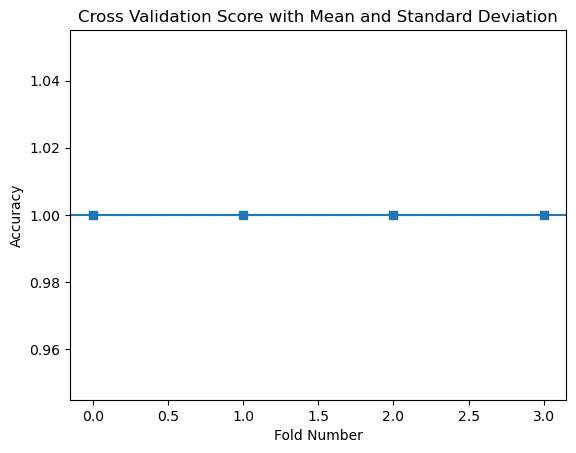

In [12]:
# Calling the "calculating_accuracy_score" function
calculating_accuracy_score(X, y, mlp)

---------------------------------------------------

# MLP - Circles 

In [13]:

mlp = MLPClassifier(hidden_layer_sizes=(21,), alpha=1e-1,
                    solver='sgd', verbose=False, tol=1e-4, random_state=1,
                    learning_rate_init=.1)

sample= SampleData()

X, y = sample.get_donut(n_samples=1500)


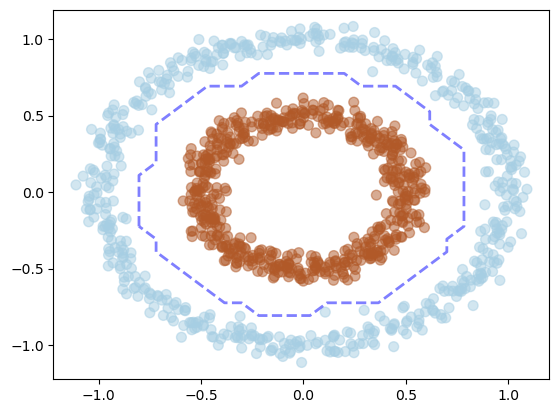

Split  : 1
Training Score : 1.000
Testing Score  : [1.0]


---

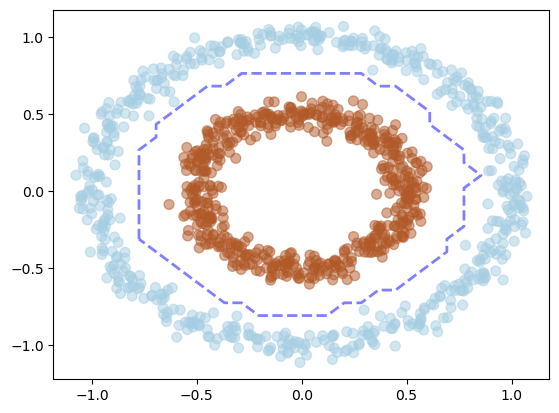

Split  : 2
Training Score : 1.000
Testing Score  : [1.0, 1.0]


---

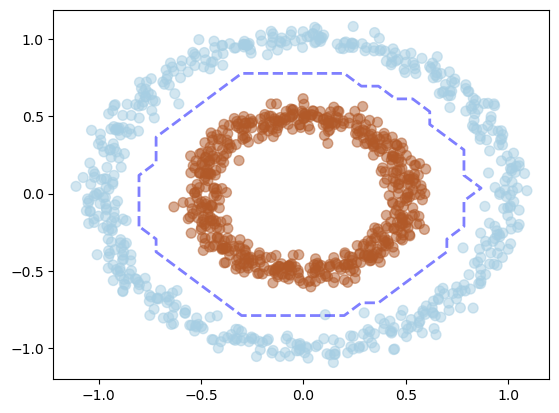

Split  : 3
Training Score : 1.000
Testing Score  : [1.0, 1.0, 1.0]


---

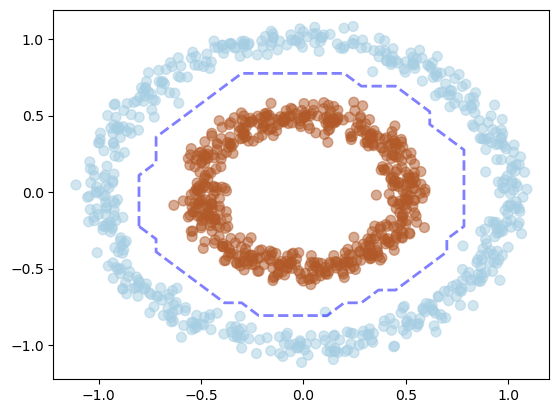

Split  : 4
Training Score : 1.000
Testing Score  : [1.0, 1.0, 1.0, 1.0]


---

Cross Validation Score : [1. 1. 1. 1.]


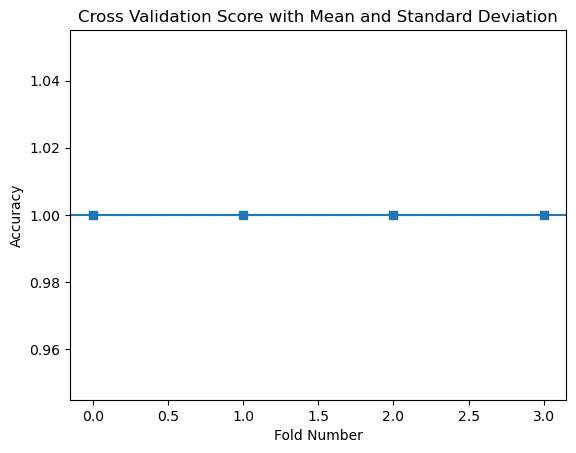

In [14]:
# Calling the "calculating_accuracy_score" function
calculating_accuracy_score(X, y, mlp)

---------------------------------------------------

# THE BIGGEST QUESTION IS ---- HOW DO WE KNOW THE OPTIMAL PARAMETERS? 

We use GRIDSEARCHCV for hyper parameter tuning. The hyperparamters determine the performance of our model. What GridSearchCV does is , it iterates through our hyperparameters we have defined & then fit our model on y_training.
It will try all possible permutations & evaluates model performance using cross validation 


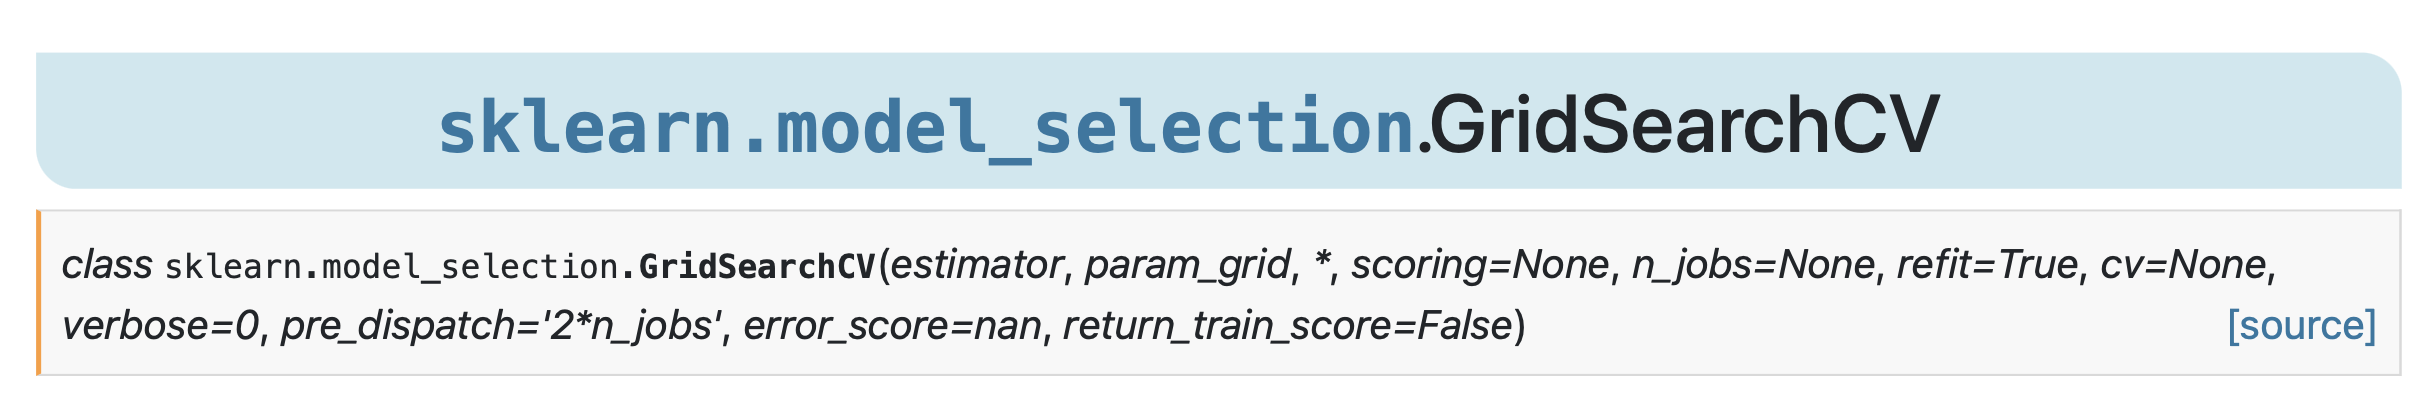




**estimator**: ML model we want to tune 

**param_grid** : List of hyper para that need to be tuned

**scoring** : evaluating metric ( like Accuracy, precision, etc ) for the model performance. Their scores are aggregated. 

**refit** : True means we want to refit our model on the tuned hyperparamaters. False means we dont want to refit our model .

    
    


In [15]:
#Defining Grid search function for using GridSearchCV- this will be used for optimisation 

from sklearn.model_selection import GridSearchCV, KFold
from sklearn.datasets import make_moons
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score
from IPython.display import Markdown, display
import time



def grid_search_function(X, y):
    HIGHLIGHT_START = '\033[1;32m'  # Start highlight
    HIGHLIGHT_END = '\033[0m'  # End highlighting
    
    start=time.time()
    
    kFold = KFold(n_splits=4, shuffle=True)
    number_of_splits = 0
    scores = []
    
    param_grid = {
        'hidden_layer_sizes': [(10), (20), (30),(40),(10,10)],
        'solver': ['lbfgs', 'sgd'],
        'learning_rate_init': [0.001, 0.01, 0.1],
        'activation': ['sigmoid', 'relu']
        }
    
    mlp = MLPClassifier(
        hidden_layer_sizes=(21,), alpha=1e-1,
        solver='sgd', verbose=False, tol=1e-4, random_state=1,
        learning_rate_init=.1, max_iter=201
        )
    
    grid = GridSearchCV(mlp, param_grid, cv=5)
    
    for train_index, test_index in kFold.split(X):
        number_of_splits += 1
        X_train, X_test, y_train, y_test = X[train_index], X[test_index], y[train_index], y[test_index]
        
        grid.fit(X_train, y_train)
        
        best_parameter = grid.best_params_
        
        mlp_best_parameter = MLPClassifier(**best_parameter, random_state=1)
        
        # Fitting classifier to training data
        mlp_best_parameter.fit(X_train, y_train)
        
        # Training & Testing labels predictions using X_train and X_test
        y_training_prediction = mlp_best_parameter.predict(X_train)
        y_testing_prediction = mlp_best_parameter.predict(X_test)
        
        # Scores Calculations
        training_score = accuracy_score(y_train, mlp_best_parameter.predict(X_train))
        testing_score = accuracy_score(y_test, mlp_best_parameter.predict(X_test))
        
        scores.append(testing_score)  # This is the testing score
        
        plot_decision_boundary_mlp(X_train, y_train, mlp_best_parameter)
        
        print(f"{HIGHLIGHT_START}Split  : {number_of_splits}{HIGHLIGHT_END}")
        print(f"Training Score : {training_score:.3f}")
        print(f"Testing Score  : {scores}")
        
        print("Best parameters:", best_parameter)
        
        display(Markdown("---"))
    
    sc_arr = np.array(scores)
    
    end = time.time()
    
    totaltime=end-start 
    print(f"Cross Validation Score : {sc_arr}")
    print(f"{HIGHLIGHT_START}Computation Time : {totaltime:.2f} seconds{HIGHLIGHT_END}")
    
    plt.plot(sc_arr, '-.s')
    
    plt.axhline(sc_arr.mean())
    # plt.fill_between(list(range(len(sc_arr))), sc_arr - np.std(sc_arr), sc_arr + np.std(sc_arr), color='cyan')
    
    # Customising the Graph
    plt.title("Cross Validation Score with Mean and Std Deviation")
    plt.xlabel('Fold Number')
    plt.ylabel('Accuracy')
    plt.show()


# Optimisation- Makemoon

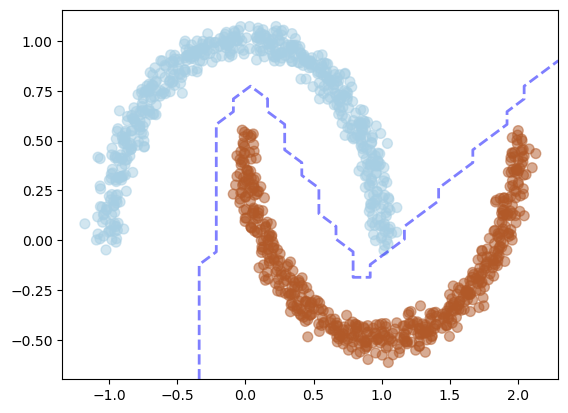

Split  : 1
Training Score : 1.000
Testing Score  : [1.0]
Best parameters: {'activation': 'relu', 'hidden_layer_sizes': 20, 'learning_rate_init': 0.001, 'solver': 'lbfgs'}


---

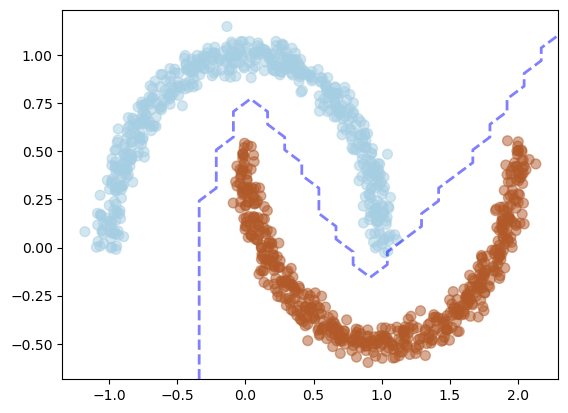

Split  : 2
Training Score : 1.000
Testing Score  : [1.0, 1.0]
Best parameters: {'activation': 'relu', 'hidden_layer_sizes': 20, 'learning_rate_init': 0.001, 'solver': 'lbfgs'}


---

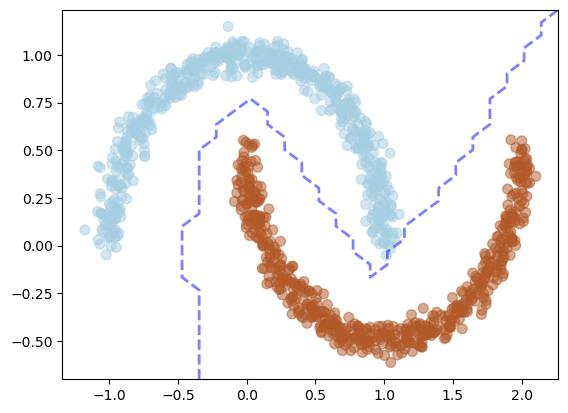

Split  : 3
Training Score : 1.000
Testing Score  : [1.0, 1.0, 1.0]
Best parameters: {'activation': 'relu', 'hidden_layer_sizes': 20, 'learning_rate_init': 0.001, 'solver': 'lbfgs'}


---

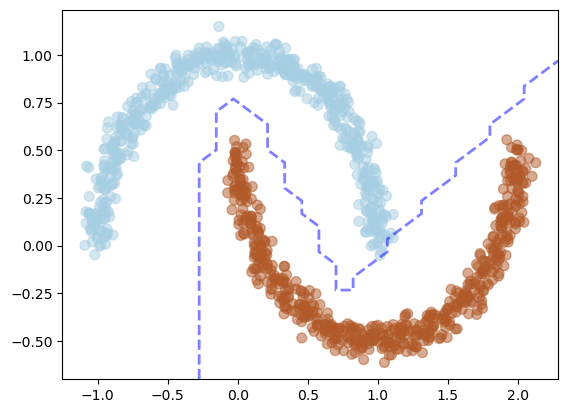

Split  : 4
Training Score : 1.000
Testing Score  : [1.0, 1.0, 1.0, 1.0]
Best parameters: {'activation': 'relu', 'hidden_layer_sizes': 20, 'learning_rate_init': 0.001, 'solver': 'lbfgs'}


---

Cross Validation Score : [1. 1. 1. 1.]
Computation Time : 34.40 seconds


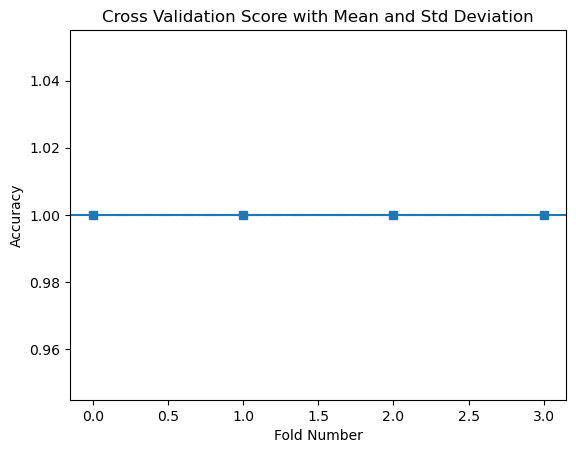

In [16]:
sample_data = SampleData()

X, y = sample_data.get_moon(n_samples=1500)
grid_search_function(X,y)

# Optimisation- Circles

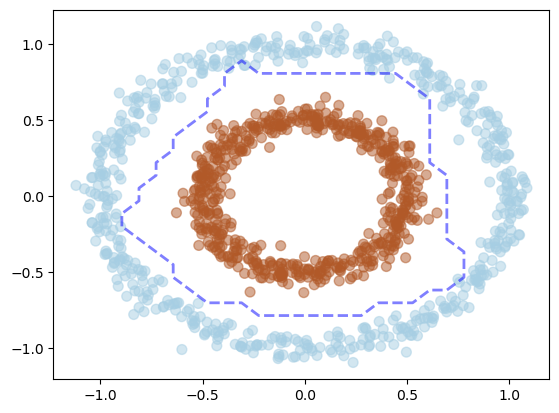

Split  : 1
Training Score : 1.000
Testing Score  : [1.0]
Best parameters: {'activation': 'relu', 'hidden_layer_sizes': 10, 'learning_rate_init': 0.001, 'solver': 'lbfgs'}


---

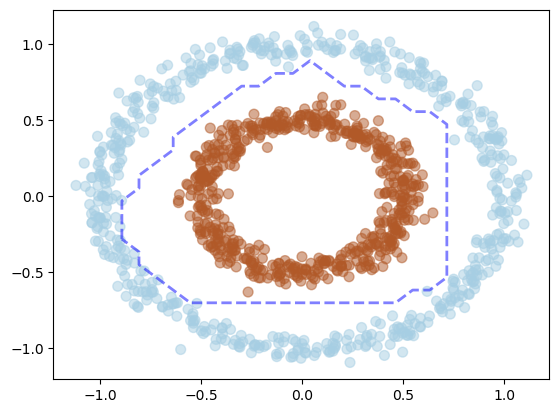

Split  : 2
Training Score : 1.000
Testing Score  : [1.0, 1.0]
Best parameters: {'activation': 'relu', 'hidden_layer_sizes': 10, 'learning_rate_init': 0.001, 'solver': 'lbfgs'}


---

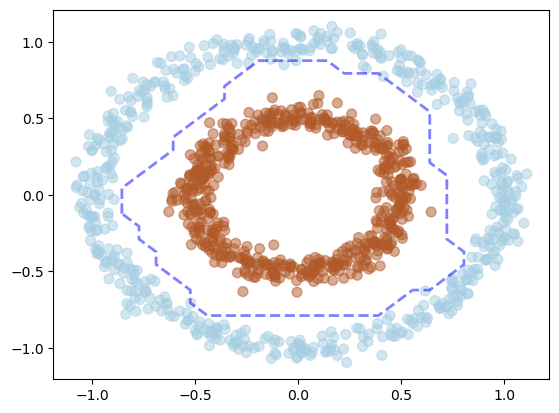

Split  : 3
Training Score : 1.000
Testing Score  : [1.0, 1.0, 1.0]
Best parameters: {'activation': 'relu', 'hidden_layer_sizes': 10, 'learning_rate_init': 0.001, 'solver': 'lbfgs'}


---

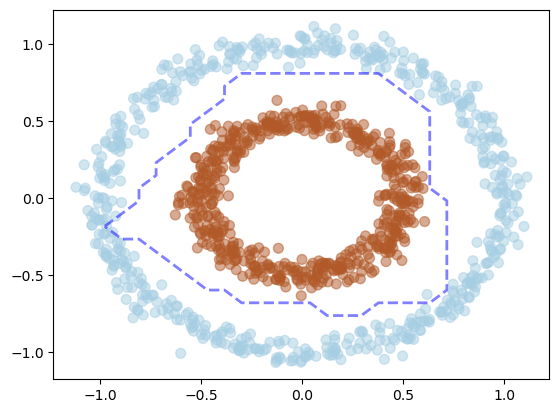

Split  : 4
Training Score : 1.000
Testing Score  : [1.0, 1.0, 1.0, 0.9973333333333333]
Best parameters: {'activation': 'relu', 'hidden_layer_sizes': 10, 'learning_rate_init': 0.001, 'solver': 'lbfgs'}


---

Cross Validation Score : [1.         1.         1.         0.99733333]
Computation Time : 34.94 seconds


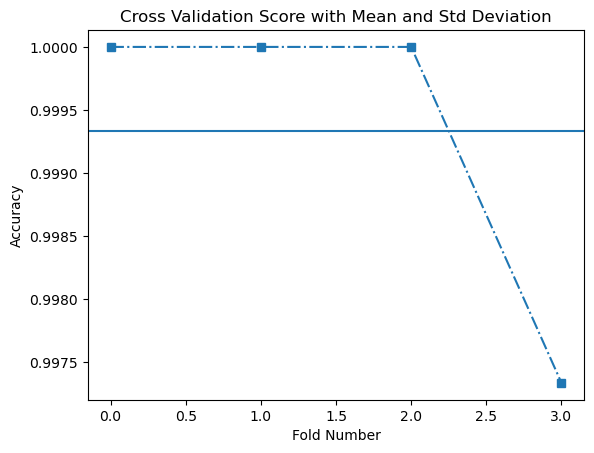

In [17]:
sample_data = SampleData()

X, y = sample_data.get_donut(n_samples=1500)
grid_search_function(X,y)

**Compare SVM and MLP solution in terms of computational cost**

We imported "time" for calculating the Computation Time for each kernel for makemoon and circles dataset. This is [done here](#Computation)

USING SVM : From [here](#Computation), we get : 



**Linear**
> Makemoons - 5.00 seconds , Circles - 3.06 seconds


**Polynomial**
> Makemoons - 5.82 seconds  ,Circles - 3.07 seconds


**RBF**
> Makemoons - 7.04 seconds , Circles - 6.77 seconds


MLP - [GridSearchCV ](#mlpgrid) : 

Makemoons - 99.06 seconds , 
Circles- 87.74 seconds


SVM, especically Linear Kernel for Makemoons and for Circles have lowest computational time for datapoints 1500 and 4 K folds cross validation. 
